# Advanced python: Data basics

In the following notebook, we will practice loading data from folder (using `numpy`, though you will be able to find ways to read all kinds of files on the internet). We will make sense of the fields/items of the dataset and do some basic visualizations.

The example data is adapted from a published dataset by [Daie et al. 2021](https://doi.org/10.1038/s41593-020-00776-3)-session 74. Data were obtained from 2-photon imaging of the (left) Anterolateral Motor cortex (ALM) using GCaM6s indicators.

**Key points of practice/pay attention to**
1. importing packages
2. path, file I/O
3. accessing dictionaries
4. for-loop
5. function definition
6. `numpy` operations: averaging, etc.
7. `matplotlib` basics: plotting, creating legend, etc.

In [66]:
# import packages
import os # file system
import numpy as np # math/numerical
import matplotlib.pyplot as plt # plotting

In [54]:
# specify the path to the data file
# Note: this is a relative path
data_path = "data/neuron.npz"

# load data: read data in with numpy and cast it into a dictionary
# (what's pickle??)
data = dict(np.load(data_path, allow_pickle=True))

### Exercises 1: What's in the dataset?
1. Print out keys and reference the `data specification` document as needed.
    > *Hint* You can now access the data file as a dictionary 
2. What is the sampling rate of this data? (What even is a *sampling rate*?)
3. With *1 line of code*, for the neural activity array (`y`)
   1. How many trials are recorded?
   2. How many time points are recorded (for a single trial)?
   > What is an "axis" for a numpy array?
4. With *1 line of code*, how long (in seconds) is a trial?
5. How many types of trials are there? What are they? How many trials in total?

In [55]:
# put your code here
print("keys/fields in data:")
for k in data.keys():
    print(f"{k}: {data[k].shape} {data[k].dtype}")
print("\n") # new line

# sampling rate
dt = data["dt"]
print(f"Sampling rate: {1/dt} Hz")

# neural activity shape
# use y as the neural activity of a single neuron
y = data["y"]
n_trials, n_time = y.shape
print(f"Neural activity: {n_trials} trials, {n_time} time points (for a single trial)")

# trial length in seconds
trial_length = n_time * dt
print(f"Trial length: {trial_length} seconds")


keys/fields in data:
dt: () float64
nR: () int64
nL: () int64
y: (159, 157) float64
stim_time: (3,) int64


Sampling rate: 24.1342 Hz
Neural activity: 159 trials, 157 time points (for a single trial)
Trial length: 6.505291246446951 seconds


## Exercises 2: Visualizing neuron activity
1. In *plot 0*, visualize the activity of neuron 0 on the 8th, 50th, 104th, 153th trials (0-indexing). Plot them with different colors and create a legend.
   > Hint: You can write a little function that plots a trial of activity so that your notebook will be tidy (and short). 
2. In *plot 1* (new plot), visualize the average activity of neuron 0 across all trials.
3. In *plot 1*, show where the important time points are in the trial. What do you think this neuron is selective for? (Guess/intuition)
4. In *plot 2*, similar to *plot 1* but now visualize the average activity of neuron 0 across right and left, separately (2 lines), and create a proper legend. 
5. Extra problem: What are the pros and cons of taking an average?
   
*Note*: you can put "neural activity" as y-axis label and "time" as x-axis label.
Bonus if you can change the x-axis from time point into seconds. 

In [56]:
# what's the difference between required and optional parameters??
def plot_trial_activity(Y, colors, legends, title=None,
                        xlabel="Time (s)", ylabel="Neural activity"):
    """
    Plot the activity of a neuron.
    
    Parameters:
    - Y: array of shape (n_time, n_trials) with the activity of the trial
    - colors: list of strings, colors each of the lines/trials
    - legends: list of strings, labels for the plot
    - title: string, title for the plot (default None)
    - xlabel: string, label for the x-axis (default "Time (s)")
    - ylabel: string, label for the y-axis (default "Neural activity")
    """

    n_dims = len(Y.shape) # number of dimensions

    if (n_dims > 1):
        for i in range(Y.shape[1]):
            plt.plot(Y[:, i], label=legends[i], color=colors[i])
        plt.legend()
    else:
        plt.plot(Y, color=colors[0])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, Y.shape[-1]-1)  # only show the time points in the trial

    if title is not None:
        plt.title(title)


In [57]:
colors = ["tab:blue", "tab:red", "tab:green", "tab:orange"]

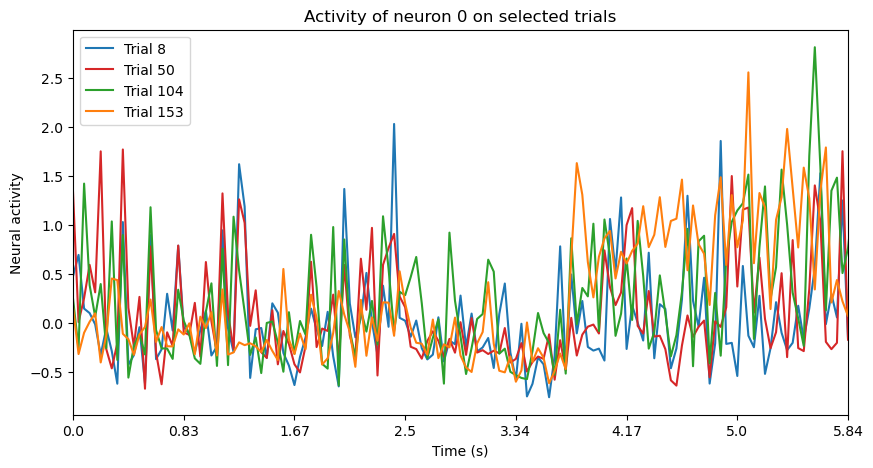

In [58]:
# put your code here for plot 0
toi = [8, 50, 104, 153] # trials to visualize
y_plot = y[:, toi]

title = "Activity of neuron 0 on selected trials"

plt.figure(figsize=(10, 5)) # make a figure
plot_trial_activity(y_plot, colors=colors, legends=[f"Trial {i}" for i in toi], title=title)

## optional things to make the plot more informative:
# time in seconds (rounded to 2 decimal places)
x_time = np.round(np.linspace(0, trial_length, n_time), 2)
# where to put the x-ticks
x_ticks_pos = range(0, n_time, 20)
_ = plt.xticks(x_ticks_pos, x_time[x_ticks_pos]) 
# put _ if you don't want to use the return value


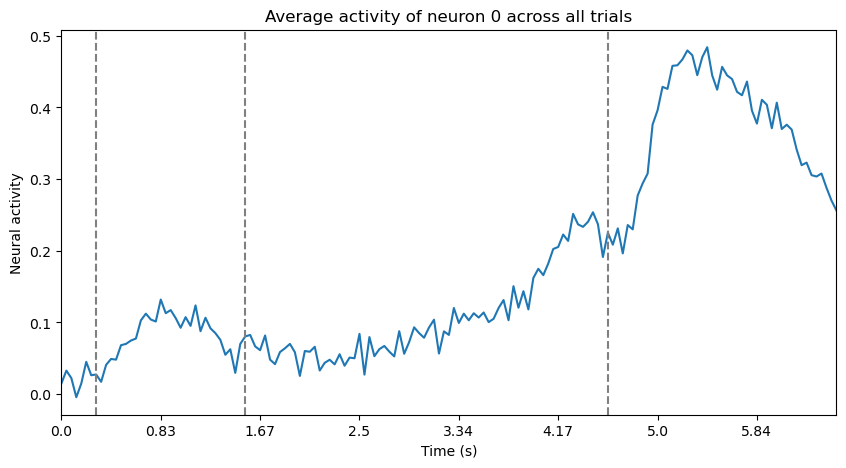

In [49]:
# put your code here for plot 1
avg_y = np.mean(y, axis=0)
plt.figure(figsize=(10, 5)) # make a figure
title = "Average activity of neuron 0 across all trials"
plot_trial_activity(avg_y, colors=colors, legends=None, title=title)

_ = plt.xticks(x_ticks_pos, x_time[x_ticks_pos])

# plot stimulus time
for t in data["stim_time"]:
    plt.axvline(t, color="grey", linestyle="--", label="Stimulus time")

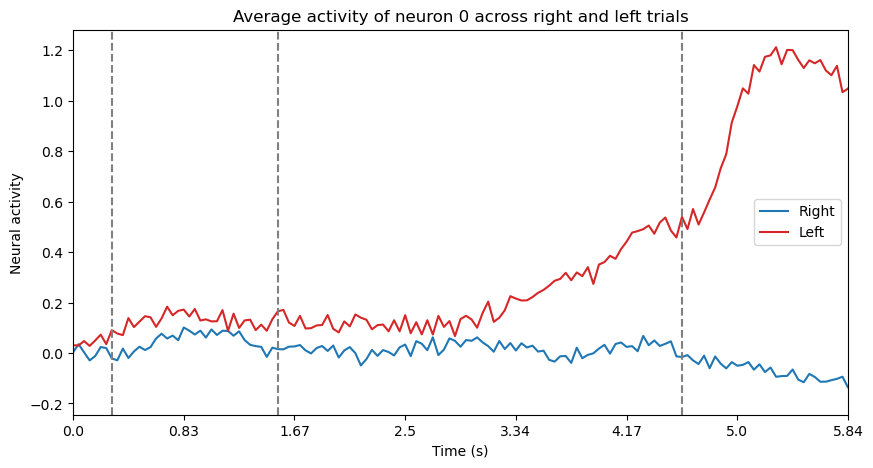

In [52]:
# put your code here for plot 2
dir_avg_y = np.zeros((n_time, 2))  # initialize an array for right and left trials

nR, nL = data["nR"], data["nL"]
n_trials = [0, nR, nR+nL]
for i in range(len(n_trials)-1):
    start_trial = n_trials[i]
    end_trial = n_trials[i+1]
    dir_avg_y[:, i] = np.mean(y[start_trial:end_trial, :], axis=0)

plt.figure(figsize=(10, 5)) # make a figure
plot_trial_activity(dir_avg_y, colors=colors[:2],
                    legends=["Right", "Left"],
                    title="Average activity of neuron 0 across right and left trials")

_ = plt.xticks(x_ticks_pos, x_time[x_ticks_pos])

# plot stimulus time
for t in data["stim_time"]:
    plt.axvline(t, color="grey", linestyle="--", label="Stimulus time")


### Excises 3: A (slightly) bigger dataset
Now load a slightly bigger data file at `data/many_neurons.npz`. 
> *Hint* Feel free to use print statements and other tools to get to know the dataset.

1. With *1 line of code*, for the neural activity array (`y`)
   1. How many neurons are recorded (in this file)?
   2. How many time points are recorded?

> If previously we can call `y` a matrix, with trial and time as it's rows and columns, what is `y` now (now that it has 3 axes)?

2. How do you
   1. get the activity of neuron 0 on trial 2?
   2. get the activity of neurons 4, 5, 10 on trial 3?
   3. get the activity of neuron 3, 5 on the first 10 time points of trial 4?

In [64]:
# read in the new file
data2 = dict(np.load("data/many_neurons.npz", allow_pickle=True))

Y = data2["y"]
n_trials, n_time, n_neurons = Y.shape
print(f"Neural activity: {n_trials} trials, {n_time} time points (for a single trial), {n_neurons} neurons")

# example slicing
# neuron 4, 5, 10 and trial 3
noi = [4, 5, 10]  # neurons of interest
trial = [3] # trial of interest
y_sub = Y[trial, :, noi] # note: numpy allows slicing with lists

Neural activity: 159 trials, 157 time points (for a single trial), 12 neurons


### Challenge Exercise
Recreate the plot you made in **Exercises 2.4** (average activity for the left and right trials) for each of the neurons in the file. Save them with [`savefig` function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). 
>*Hint* loop over `y` to create one plot at a time.

When you are done with plotting:
1. Are these neurons different? In what sense?
2. Suppose we create a plot, showing the neural activity in a trial averaged across all the neurons, what would this plot tell you? Do we want this plot? Why or why not?

In [70]:
# you can package what we have written for 2.4 into a function
def plot_L_R_avg(y_data, neuron, n_trials, 
                 labels=["Right", "Left"], colors=["tab:blue", "tab:red"]):
    _, n_time = y_data.shape

    plt.figure(figsize=(10, 5)) # make a figure
    plt.title(f"Average activity of neuron {neuron} across right and left trials")
    for i in range(len(n_trials)-1):
        start, end = n_trials[i], n_trials[i+1]
        plt.plot(np.mean(y_data[start:end, :], axis=0),
                 label=labels[i], color=colors[i])
        
    plt.xlabel("Time (s)")
    plt.ylabel("Neural activity")
    plt.xlim(0, n_time-1)  # only show the time points
    plt.legend()
        


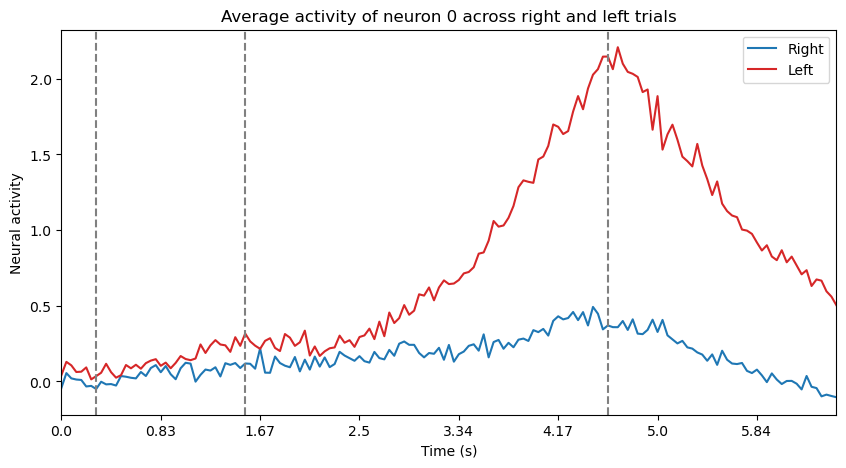

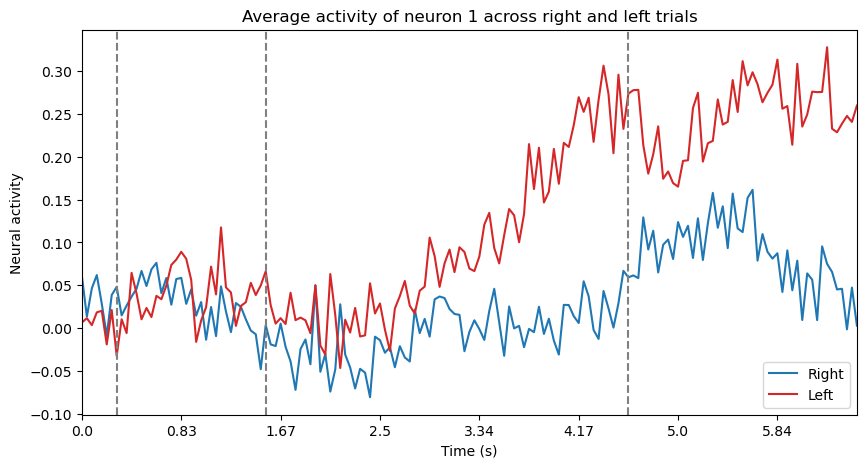

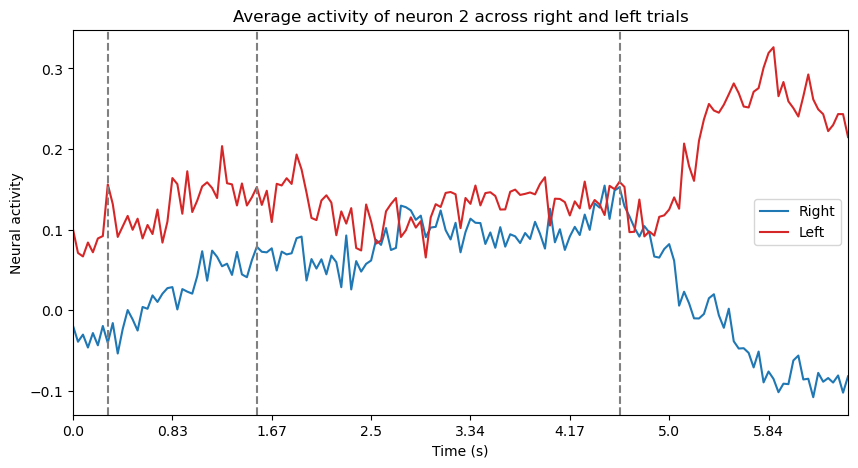

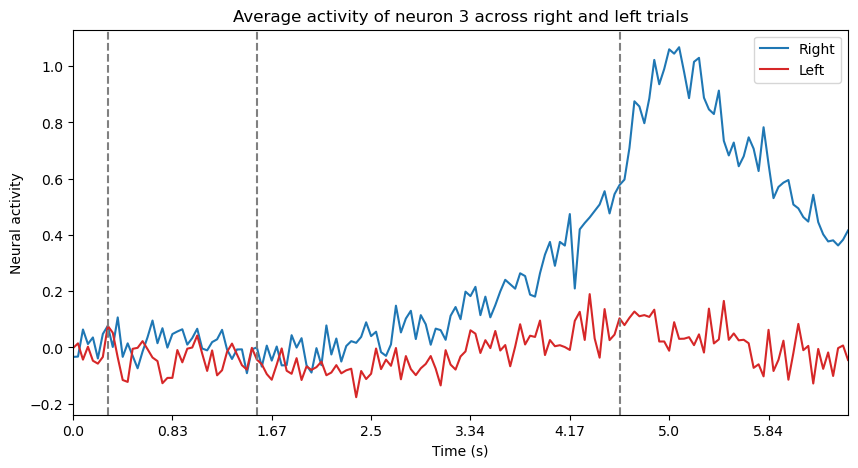

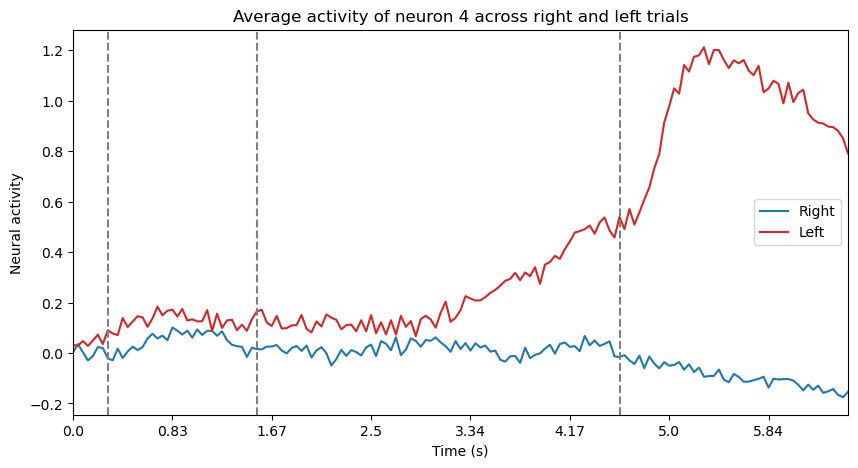

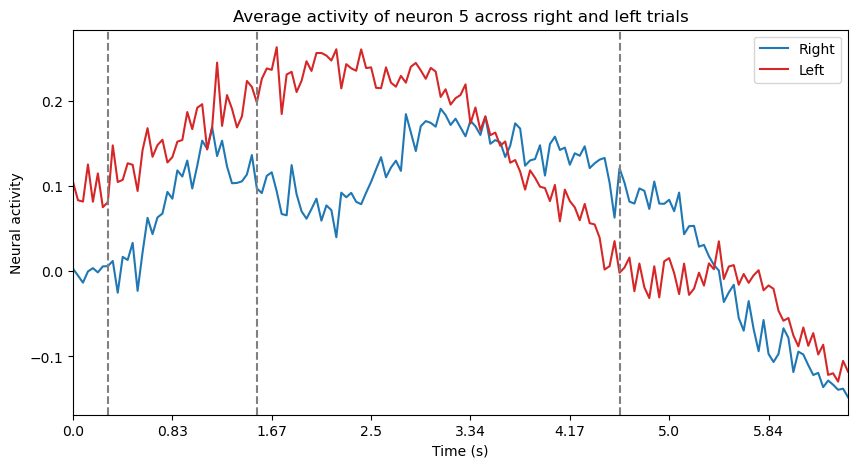

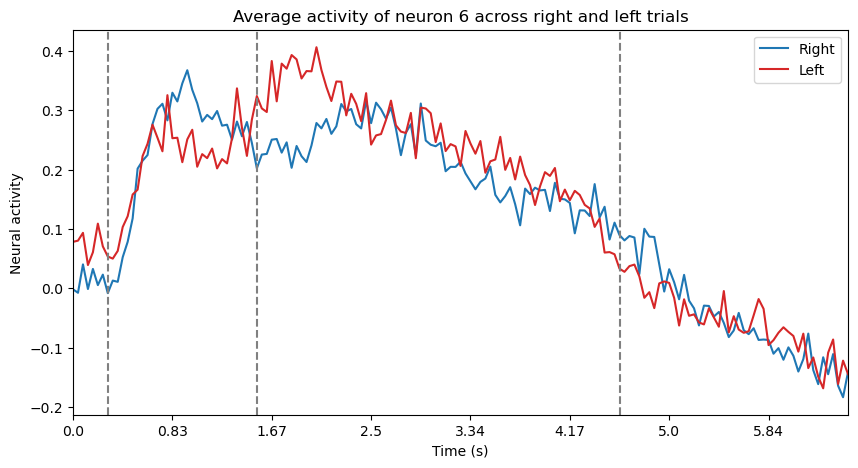

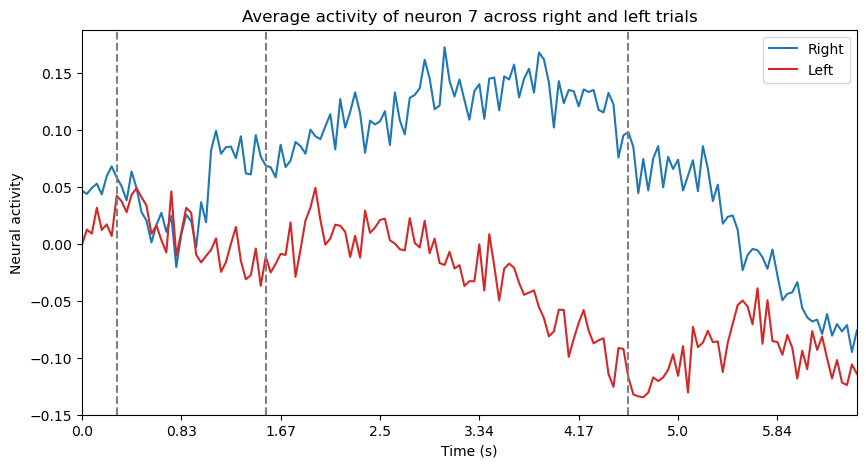

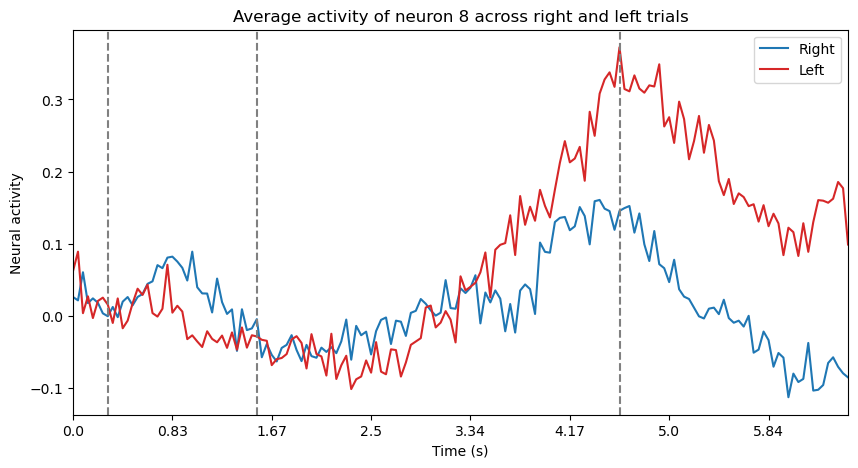

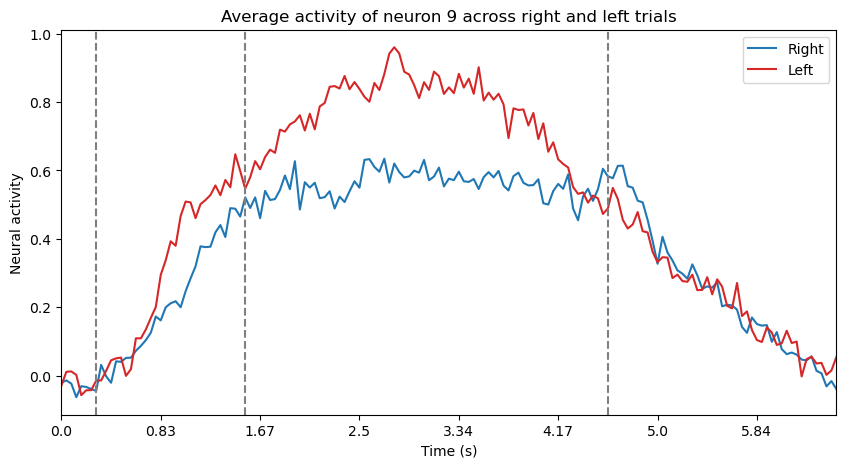

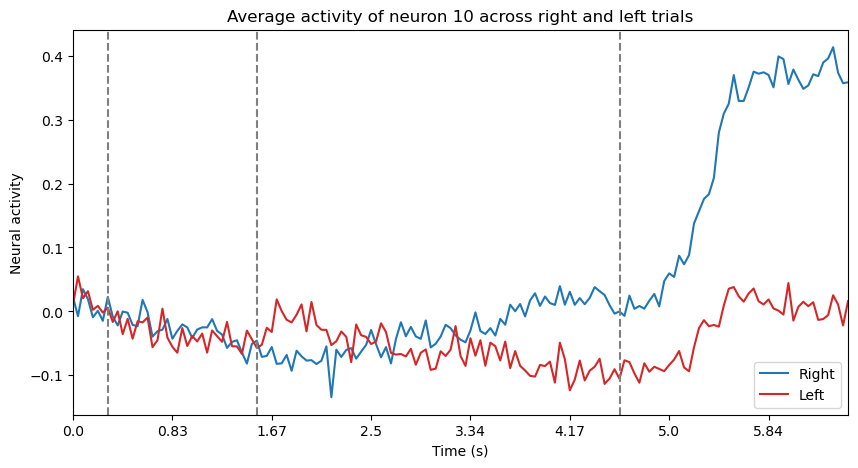

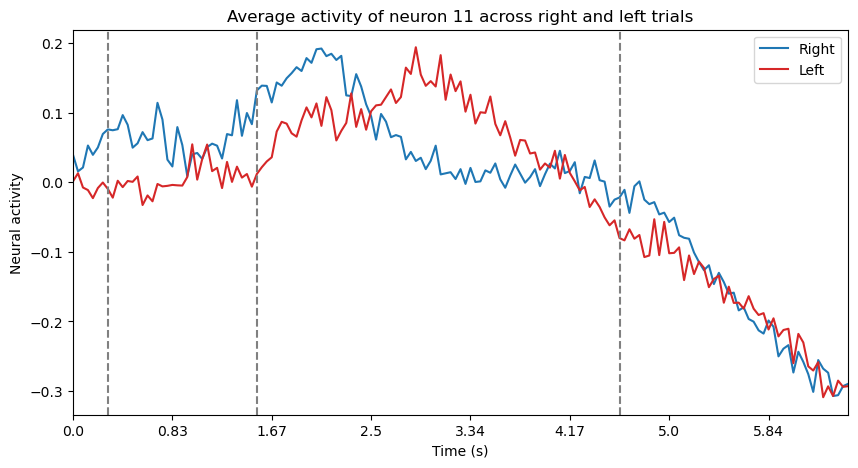

In [71]:
n_trials = [0, data2["nR"], data2["nR"] + data2["nL"]]

x_time = np.round(np.linspace(0, trial_length, n_time), 2)
x_ticks_pos = range(0, n_time, 20)

for i in range(n_neurons): # loop over neurons
    plot_L_R_avg(Y[:, :, i], i, n_trials)
    _ = plt.xticks(x_ticks_pos, x_time[x_ticks_pos])
    
    # plot stimulus time
    for t in data2["stim_time"]:
        plt.axvline(t, color="grey", linestyle="--", label="Stimulus time")
    
    # create a "figures" folder if it does not exist
    if (os.path.exists("figures") == False):
        os.makedirs("figures")

    plt.savefig(f"figures/neuron_{i}_activity.png")  # save the figure